# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [10]:
# Sua análise começa aqui.
# athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [19]:
# n = 3000
# amostra = get_sample(athletes,'height',n)
# sct.shapiro(amostra)

ShapiroResult(statistic=0.9961519837379456, pvalue=5.681722541339695e-07)

In [20]:
def q1():
    # Retorne aqui o resultado da questão 1.
    n = 3000
    amostra = get_sample(athletes,'height',n)
    alpha = 0.05
    p_value = sct.shapiro(amostra).pvalue
    if p_value < alpha:
        #Amostra possui evidências suficientes para rejeitar a hipótese nula, ou seja, rejeitar a hipótese que
        #os dados são normalmente distribuídos
        return False
    else:
        #Amostra não possui evidências suficientes para rejeitar a hipótese nula
        return True

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

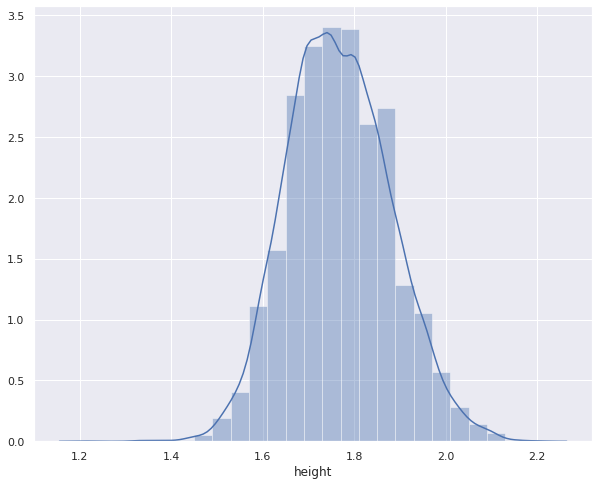

In [54]:
# sns.distplot(athletes['height'],bins=25)
#A distribuição não é simétrica e apesar de ser um pouco parecida, não é a normal.

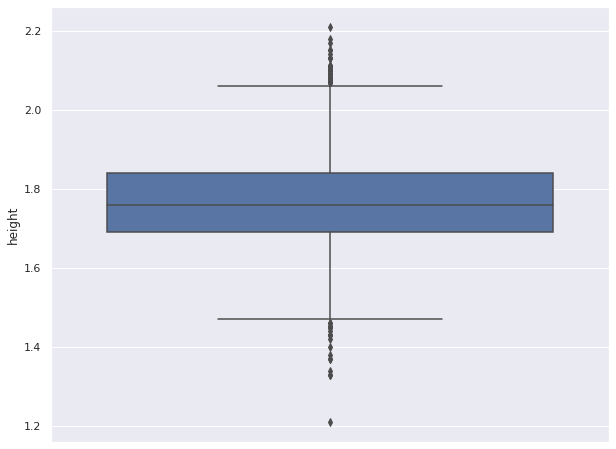

In [69]:
# sns.boxplot(athletes['height'],orient='v')

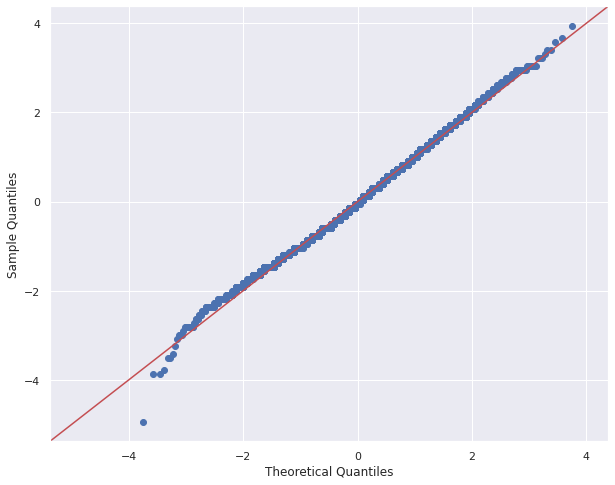

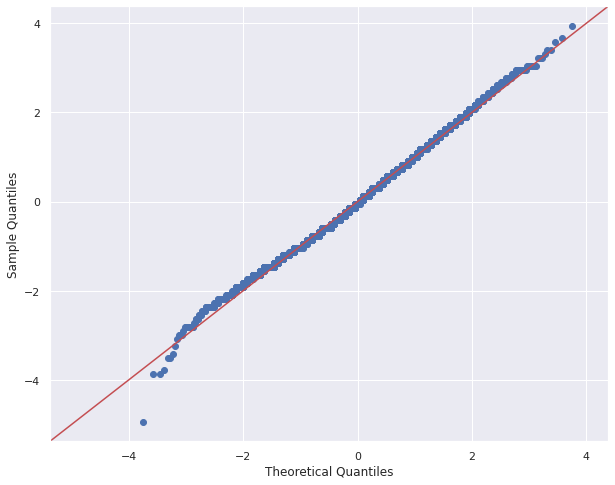

In [64]:
# sm.qqplot(athletes['height'].dropna(),fit=True,line='45')

In [65]:
# Com esse p-value minúsculo, não existe nível de significância razoável

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [66]:
# n = 3000
# amostra = get_sample(athletes,'height',n)
# alpha = 0.05
# sct.jarque_bera(amostra)

Jarque_beraResult(statistic=13.03363513594265, pvalue=0.001478366424594868)

In [7]:
def q2():
    # Retorne aqui o resultado da questão 2.
    n = 3000
    amostra = get_sample(athletes,'height',n)
    alpha = 0.05
    p_value = sct.jarque_bera(amostra).pvalue
    if p_value < alpha:
        #Amostra possui evidências suficientes para rejeitar a hipótese nula, ou seja, rejeitar a hipótese que
        #os dados são normalmente distribuídos
        return False
    else:
        #Amostra não possui evidências suficientes para rejeitar a hipótese nula
        return True

__Para refletir__:

* Esse resultado faz sentido?

In [ ]:
# Si

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [92]:
# n = 3000
# amostra = get_sample(athletes,'weight',n)
# alpha = 0.05
# sct.normaltest(amostra)

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

In [8]:
def q3():
    # Retorne aqui o resultado da questão 3.
    # Retorne aqui o resultado da questão 2.
    n = 3000
    amostra = get_sample(athletes,'weight',n)
    alpha = 0.05
    p_value = sct.normaltest(amostra).pvalue
    if p_value < alpha:
        #Amostra possui evidências suficientes para rejeitar a hipótese nula, ou seja, rejeitar a hipótese que
        #os dados são normalmente distribuídos
        return False
    else:
        #Amostra não possui evidências suficientes para rejeitar a hipótese nula
        return True

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

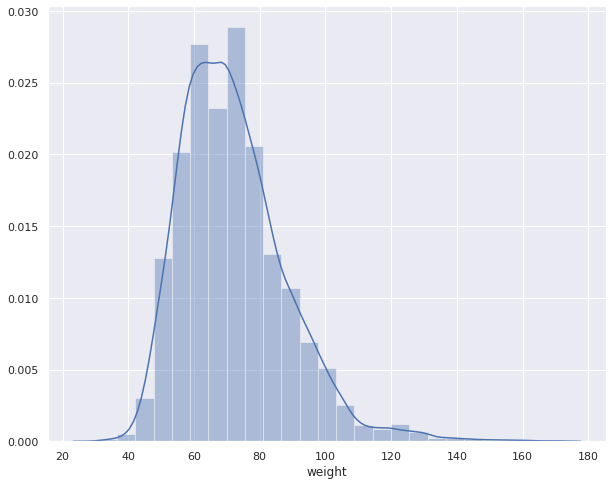

In [81]:
# sns.distplot(athletes['weight'],bins=25)
#Sim, têm a forma duma distribuição positive skewed

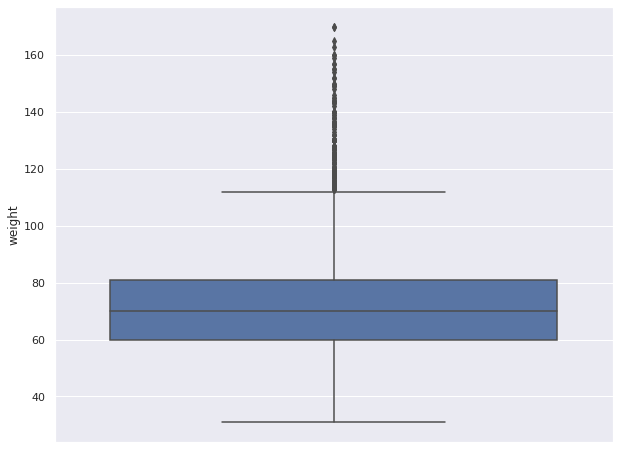

In [87]:
# sns.boxplot(athletes['weight'],orient='v')


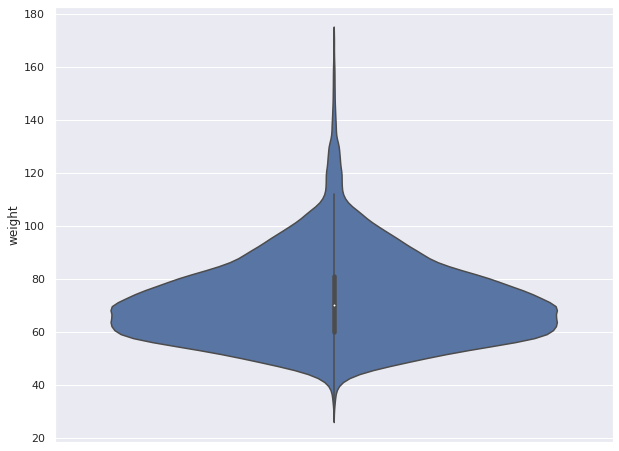

In [86]:
# sns.violinplot(athletes['weight'],orient='v')

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [94]:
# log_amostra = np.log(amostra)
# alpha = 0.05
# sct.normaltest(log_amostra)

NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)

In [9]:
def q4():
    # Retorne aqui o resultado da questão 4.
    n = 3000
    amostra = get_sample(athletes,'weight',n)
    log_amostra = np.log(amostra)
    alpha = 0.05
    p_value = sct.normaltest(log_amostra).pvalue
    if p_value < alpha:
        #Amostra possui evidências suficientes para rejeitar a hipótese nula, ou seja, rejeitar a hipótese que
        #os dados são normalmente distribuídos
        return False
    else:
        #Amostra não possui evidências suficientes para rejeitar a hipótese nula
        return True

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

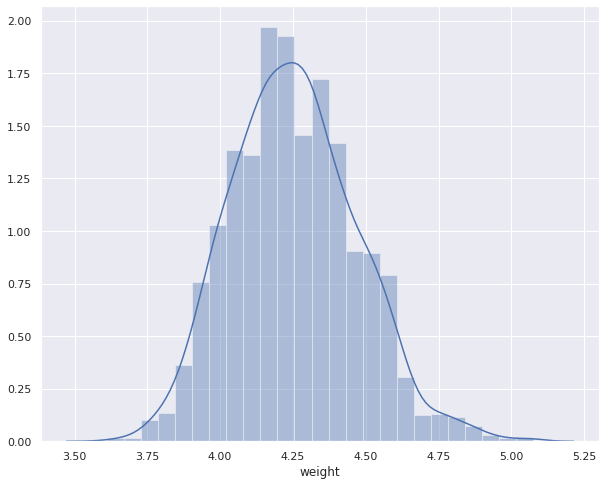

In [95]:
# sns.distplot(log_amostra,bins=25)
# Sim ,ela diminuiu o skew, mas continua positive skewed
# Esperava, se a hipótese fosse confirmada, concluiríamos que weight segue uma log-normal.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [98]:
#athletes.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [99]:
# bra = athletes[athletes['nationality'] == 'BRA']
# usa = athletes[athletes['nationality'] == 'USA']
# can = athletes[athletes['nationality'] == 'CAN']

In [111]:
# bra_heights = bra['height'].dropna()
# usa_heights = usa['height'].dropna()
# sct.ttest_ind(bra_heights,usa_heights,equal_var=False)

Ttest_indResult(statistic=-3.2232436467501553, pvalue=0.0013080041830144061)

In [114]:
def q5():
    # Retorne aqui o resultado da questão 5.
    bra = athletes[athletes['nationality'] == 'BRA']
    usa = athletes[athletes['nationality'] == 'USA']
    bra_heights = bra['height'].dropna()
    usa_heights = usa['height'].dropna()
    alpha = 0.05
    p_value = sct.ttest_ind(bra_heights,usa_heights,equal_var=False).pvalue
    if p_value < alpha:
        #Amostra possui evidências suficientes para rejeitar a hipótese nula, ou seja, rejeitar a hipótese que
        #os dados são normalmente distribuídos
        return False
    else:
        #Amostra não possui evidências suficientes para rejeitar a hipótese nula
        return True

In [117]:
# print('médias bra = ',bra_heights.mean())
# print('médias usa = ',usa_heights.mean())

médias bra =  1.764033613445379
médias usa =  1.7877678571428557


## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [116]:
# bra_heights = bra['height'].dropna()
# can_heights = can['height'].dropna()
# sct.ttest_ind(bra_heights,can_heights,equal_var=False)

Ttest_indResult(statistic=0.638930491436537, pvalue=0.5230827295443041)

In [120]:
def q6():
    # Retorne aqui o resultado da questão 6.
    bra = athletes[athletes['nationality'] == 'BRA']
    can = athletes[athletes['nationality'] == 'CAN']
    bra_heights = bra['height'].dropna()
    can_heights = can['height'].dropna()
    alpha = 0.05
    p_value = sct.ttest_ind(bra_heights,can_heights,equal_var=False).pvalue
    if p_value < alpha:
        #Amostra possui evidências suficientes para rejeitar a hipótese nula, ou seja, rejeitar a hipótese que
        #os dados são normalmente distribuídos
        return False
    else:
        #Amostra não possui evidências suficientes para rejeitar a hipótese nula
        return True

In [122]:
# print('médias bra = ',bra_heights.mean())
# print('médias can = ',can_heights.mean())

médias bra =  1.764033613445379
médias can =  1.7585937500000004


## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [123]:
# sct.ttest_ind(usa_heights,can_heights,equal_var=False)

Ttest_indResult(statistic=3.516987632488539, pvalue=0.00046601293473888875)

In [125]:
def q7():
    usa = athletes[athletes['nationality'] == 'USA']
    can = athletes[athletes['nationality'] == 'CAN']
    usa_heights = usa['height'].dropna()
    can_heights = can['height'].dropna()
    p_value = sct.ttest_ind(usa_heights,can_heights,equal_var=False).pvalue
    return float(np.round(p_value,8))

In [124]:
# print('médias usa = ',usa_heights.mean())
# print('médias can = ',can_heights.mean())

médias usa =  1.7877678571428557
médias can =  1.7585937500000004


__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?